In [1]:
import pandas as pd;
import os;
import sys;
!{sys.executable} -m pip install cmapPy;
import cmapPy;
from cmapPy.pandasGEXpress.parse import parse;
import matplotlib.pyplot as plt

In [2]:
#1
def process_gct(gct_file, summary=False):
    if summary:
        gct_dataframe = cmapPy.pandasGEXpress.parse.parse(gct_file)
        print(str(gct_dataframe.data_df.shape[0]) + ' rows and ' + str(gct_dataframe.data_df.shape[1]) + ' columns were imported.')
        return gct_dataframe
    else:
        gct_dataframe = cmapPy.pandasGEXpress.parse.parse(gct_file)
        return gct_dataframe

In [3]:
#2A
gct_df = process_gct('BRCA_minimal_60x19.gct', True)
gct_df

60 rows and 19 columns were imported.


In [4]:
#2B
gct_df = process_gct('BRCA_large_20783x40.gct')
gct_df

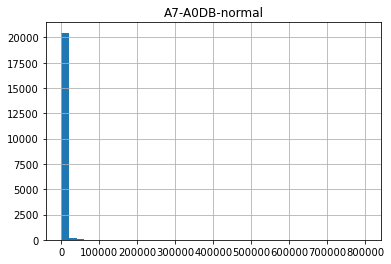

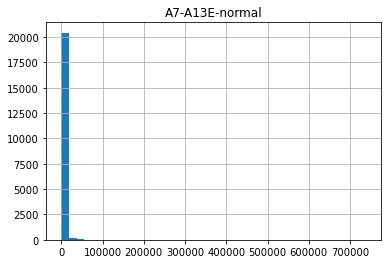

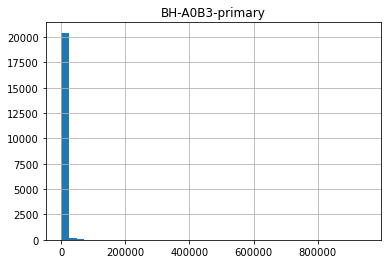

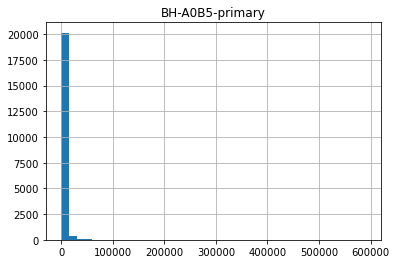

In [5]:
#3
hist1 = gct_df.data_df.hist(column='A7-A0DB-normal',bins=40)
hist2 = gct_df.data_df.hist(column='A7-A13E-normal', bins=40)
hist3 = gct_df.data_df.hist(column='BH-A0B3-primary', bins=40)
hist4 = gct_df.data_df.hist(column='BH-A0B5-primary', bins=40)

In [15]:
#4
gct_df_new = gct_df.data_df.copy()
gct_df_new['Mean'] = gct_df_new.mean(numeric_only=True, axis=1)
gct_df_new['Median'] = gct_df_new.median(numeric_only=True, axis=1)
gct_df_new['Standard Deviation'] = gct_df_new.std(numeric_only=True, axis=1)
gct_df_new

cid,A7-A0CE-normal,A7-A0CH-normal,A7-A0D9-normal,A7-A0DB-normal,A7-A13E-normal,A7-A13F-normal,A7-A13G-normal,AC-A23H-normal,AC-A2FB-normal,AC-A2FF-normal,...,BH-A0AZ-primary,BH-A0B3-primary,BH-A0B5-primary,BH-A0B7-primary,BH-A0B8-primary,BH-A0BA-primary,BH-A0BC-primary,Mean,Median,Standard Deviation
rid,,,,,,,,,,,,,,,,,,,,,
TSPAN6,5404.0,5030.0,3616.0,2425.0,3400.0,3276.0,4611.0,7362.0,5389.0,4686.0,...,1946.0,2498.0,2709.0,3701.0,2390.0,6725.0,1173.0,3703.475098,3701.0,1772.747192
TNMD,320.0,2116.0,3616.0,304.0,992.0,2159.0,869.0,234.0,1218.0,103.0,...,54.0,20.0,20.0,88.0,38.0,113.0,92.0,489.750000,107.0,774.445862
DPM1,2472.0,1611.0,1254.0,1137.0,1242.0,1295.0,1896.0,1813.0,1930.0,2143.0,...,1235.0,1853.0,1739.0,2172.0,1391.0,3203.0,1709.0,1990.775024,1846.0,935.971130
SCYL3,1483.0,1154.0,820.0,687.0,931.0,1178.0,1262.0,1684.0,1589.0,1829.0,...,1705.0,1168.0,3469.0,2544.0,1274.0,4205.0,1687.0,1822.000000,1597.0,937.156921
C1orf112,312.0,252.0,225.0,241.0,259.0,277.0,256.0,390.0,331.0,524.0,...,354.0,1166.0,2086.0,325.0,462.0,2162.0,1015.0,628.875000,416.0,504.518280
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
HCP5B,20.0,20.0,20.0,20.0,20.0,25.0,22.0,25.0,20.0,20.0,...,20.0,20.0,20.0,20.0,20.0,20.0,20.0,23.400000,20.0,17.599112
SPRY4-IT1,20.0,20.0,27.0,24.0,30.0,32.0,41.0,20.0,20.0,42.0,...,20.0,20.0,20.0,36.0,20.0,20.0,20.0,25.000000,20.0,16.635548
AC018638.8,27.0,20.0,37.0,78.0,44.0,75.0,139.0,99.0,60.0,104.0,...,23.0,20.0,104.0,28.0,25.0,103.0,21.0,67.949997,61.0,41.067184


In [19]:
#5A
rows_to_keep = int(0.9*len(gct_df_new))
gct_df_new_filtered = gct_df_new.nsmallest(rows_to_keep, 'Standard Deviation')
gct_df_new_filtered

cid,A7-A0CE-normal,A7-A0CH-normal,A7-A0D9-normal,A7-A0DB-normal,A7-A13E-normal,A7-A13F-normal,A7-A13G-normal,AC-A23H-normal,AC-A2FB-normal,AC-A2FF-normal,...,BH-A0AZ-primary,BH-A0B3-primary,BH-A0B5-primary,BH-A0B7-primary,BH-A0B8-primary,BH-A0BA-primary,BH-A0BC-primary,Mean,Median,Standard Deviation
rid,,,,,,,,,,,,,,,,,,,,,
MIR196A2,20.0,20.0,20.0,20.0,20.0,20.0,20.0,20.0,20.0,20.0,...,20.0,20.0,20.0,20.0,20.0,20.0,20.0,22.500000,20.0,15.425749
AC007279.1,20.0,20.0,20.0,20.0,20.0,20.0,20.0,20.0,20.0,20.0,...,20.0,20.0,20.0,20.0,20.0,20.0,20.0,22.500000,20.0,15.425749
GNA14-AS1,20.0,20.0,20.0,20.0,20.0,20.0,20.0,20.0,20.0,20.0,...,20.0,20.0,20.0,20.0,20.0,20.0,20.0,22.500000,20.0,15.425749
RPEP4,20.0,20.0,20.0,20.0,20.0,20.0,20.0,20.0,20.0,20.0,...,20.0,20.0,20.0,20.0,20.0,20.0,20.0,22.500000,20.0,15.425749
KRT18P63,20.0,20.0,20.0,20.0,20.0,20.0,20.0,20.0,20.0,20.0,...,20.0,20.0,20.0,20.0,20.0,20.0,20.0,22.500000,20.0,15.425749
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
NFIA,7126.0,7274.0,7949.0,5941.0,6735.0,5911.0,11638.0,10207.0,10953.0,9169.0,...,3426.0,1914.0,8089.0,16430.0,3870.0,6793.0,7789.0,6869.299805,6793.0,3196.553711
DBN1,5361.0,5511.0,4991.0,8619.0,3754.0,3336.0,3123.0,5697.0,8959.0,7181.0,...,4002.0,6108.0,9862.0,17701.0,4169.0,2219.0,13547.0,5457.674805,4391.0,3196.833008
SEMA3F,5125.0,3239.0,1133.0,1729.0,2573.0,2118.0,1666.0,1877.0,3101.0,4372.0,...,2383.0,4823.0,11359.0,6093.0,5689.0,8673.0,7336.0,4920.299805,3911.0,3204.032471


cid
A7-A0CE-normal     1483.951050
A7-A0CH-normal     1226.841553
A7-A0D9-normal      958.922791
A7-A0DB-normal      915.061829
A7-A13E-normal      951.364197
A7-A13F-normal     1041.000610
A7-A13G-normal     1281.722046
AC-A23H-normal     1381.501343
AC-A2FB-normal     1550.661621
AC-A2FF-normal     1737.991333
AC-A2FM-normal     1189.578613
BH-A0AU-normal     1223.027100
BH-A0AY-normal     1074.947876
BH-A0AZ-normal     1621.079590
BH-A0B3-normal     1434.162109
BH-A0B5-normal     1091.059448
BH-A0B7-normal     1184.854614
BH-A0B8-normal     1040.873779
BH-A0BA-normal      986.037964
BH-A0Bc-normal     1024.977051
A7-A0CE-primary    1458.019531
A7-A0CH-primary    1075.178833
A7-A0D9-primary    1265.842041
A7-A0DB-primary    1238.317749
A7-A13E-primary    1211.962769
A7-A13F-primary    1176.750122
A7-A13G-primary    1037.985718
AC-A23H-primary    1657.331421
AC-A2FB-primary    1484.233154
AC-A2FF-primary    1482.230713
AC-A2FM-primary    1512.691772
BH-A0AU-primary    1134.330078
BH-A

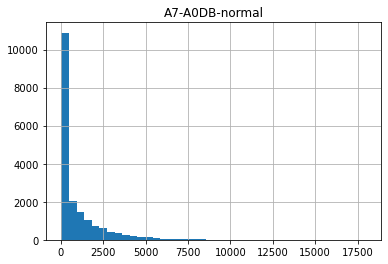

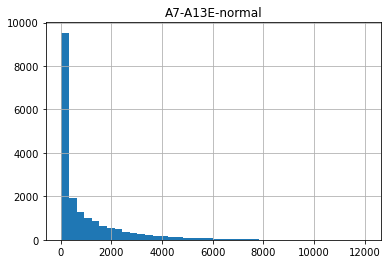

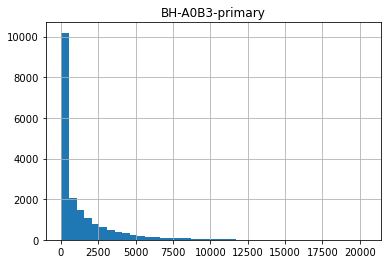

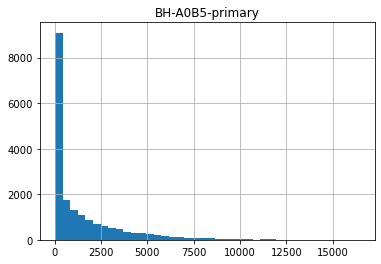

In [31]:
#5B
print(gct_df_new_filtered.loc[:, ~gct_df_new_filtered.columns.isin(['Mean', 'Median', 'Standard Deviation'])].mean())
print(gct_df_new_filtered.loc[:, ~gct_df_new_filtered.columns.isin(['Mean', 'Median', 'Standard Deviation'])].median())
new_hist1 = gct_df_new_filtered.hist(column='A7-A0DB-normal',bins=40)
new_hist2 = gct_df_new_filtered.hist(column='A7-A13E-normal', bins=40)
new_hist3 = gct_df_new_filtered.hist(column='BH-A0B3-primary', bins=40)
new_hist4 = gct_df_new_filtered.hist(column='BH-A0B5-primary', bins=40)